In [485]:
import numpy as np 
import pandas as pd 


import os
from pmdarima.arima import auto_arima
import psycopg2 as pg

import pandas.io.sql as pd_sql
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [486]:
import psycopg2 as pg

connection_args = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'names',    # DB that we are connecting to
    'port': 5432          # port for psql
}

# We will talk about this magic Python trick!
connection = pg.connect(**connection_args)
from sqlalchemy import create_engine
engine = create_engine('postgresql://hansremy:Hryr1321@@localhost:5432/Project5')

In [487]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [488]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [489]:
rootPathSourceData = './Data/smart-meters-in-london/'

In [490]:
weatherHourlyPath = rootPathSourceData + 'weather_hourly_darksky.csv'
df_weatherHourly = pd.read_csv(weatherHourlyPath, header=0, sep=',')

In [491]:
df_weatherHourly

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy
...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear


In [492]:
# Postgres info to connect
'''
connection_args = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'names',    # DB that we are connecting to
    'port': 5432          # port for psql
}

# We will talk about this magic Python trick!
connection = pg.connect(**connection_args)
from sqlalchemy import create_engine
engine = create_engine('postgresql://hansremy:Hryr1321@@localhost:5432/Project5')
df_weatherHourly.to_sql('WeatherHourly', engine)
'''

"\nconnection_args = {\n    'host': 'localhost',  # We are connecting to our _local_ version of psql\n    'dbname': 'names',    # DB that we are connecting to\n    'port': 5432          # port for psql\n}\n\n# We will talk about this magic Python trick!\nconnection = pg.connect(**connection_args)\nfrom sqlalchemy import create_engine\nengine = create_engine('postgresql://hansremy:Hryr1321@@localhost:5432/Project5')\ndf_weatherHourly.to_sql('WeatherHourly', engine)\n"

In [493]:
#df_Adversity = pd.read_pickle(('./Data/AdversityGroup.pkl') )
#df_Affluent = pd.read_pickle(('./Data/AffluentGroup.pkl') )
#df_Comfortable = pd.read_pickle(('./Data/ComfortableGroup.pkl') )

In [494]:
df_Adversity = pd.read_sql_table('Adversity',engine)
df_Affluent = pd.read_sql_table('Affluent',engine)
df_Comfortable = pd.read_sql_table('Comfortable',engine)

#df_Adversity.drop('index',axis=1,inplace=True)
#df_Affluent.drop('index',axis=1,inplace=True)
#df_Comfortable.drop('index',axis=1,inplace=True)

In [495]:
df_All = pd.read_sql_table('All',engine)

In [496]:
df_Affluent.dropna(inplace=True)
df_Adversity.dropna(inplace=True)
df_Comfortable.dropna(inplace=True)

In [497]:
df_All.dropna(inplace=True)

In [498]:
df_Affluent

,tstp,energy,temperature
647,2011-11-23 10:30:00.0000000,0.12700,4.24
648,2011-11-23 11:30:00.0000000,0.56400,5.94
649,2011-11-23 12:30:00.0000000,0.77033,7.25
650,2011-11-23 13:30:00.0000000,0.29450,8.29
651,2011-11-23 14:30:00.0000000,0.35425,10.36
...,...,...,...
40363,2014-02-27 20:00:00.0000000,0.40977,3.47
40364,2014-02-27 21:00:00.0000000,0.39611,2.50
40365,2014-02-27 22:00:00.0000000,0.36022,1.41
40366,2014-02-27 23:00:00.0000000,0.30251,1.42


In [499]:
df_ukHoliday = pd.read_sql_table('UKHoliday',engine)

In [500]:
df_ukHoliday

,Description,Date
0,Boxing Day,2012-12-26
1,Christmas Day,2012-12-25
2,Summer bank holiday,2012-08-27
3,Queen?s Diamond Jubilee (extra bank holiday),2012-05-06
4,Spring bank holiday (substitute day),2012-04-06
5,Early May bank holiday,2012-07-05
6,Easter Monday,2012-09-04
7,Good Friday,2012-06-04
8,New Year?s Day (substitute day),2012-02-01
9,Boxing Day,2013-12-26


In [501]:
df_ukHoliday['Date'] = pd.to_datetime(df_ukHoliday['Date'])

In [502]:
df_ukHoliday

,Description,Date
0,Boxing Day,2012-12-26
1,Christmas Day,2012-12-25
2,Summer bank holiday,2012-08-27
3,Queen?s Diamond Jubilee (extra bank holiday),2012-05-06
4,Spring bank holiday (substitute day),2012-04-06
5,Early May bank holiday,2012-07-05
6,Easter Monday,2012-09-04
7,Good Friday,2012-06-04
8,New Year?s Day (substitute day),2012-02-01
9,Boxing Day,2013-12-26


In [503]:
def makeHolidayDFProphet(df_Holiday):
    df = df_Holiday.groupby('Description')['Date'].apply(list)
    df = df_Holiday.groupby('Description')['Date'].apply(list).reset_index(name='ds')
    
  
    return df

In [504]:
df_Holidays = makeHolidayDFProphet(df_ukHoliday)

In [505]:
df_Holidays

,Description,ds
0,Boxing Day,"[2012-12-26 00:00:00, 2013-12-26 00:00:00, 201..."
1,Christmas Day,"[2012-12-25 00:00:00, 2013-12-25 00:00:00, 201..."
2,Early May bank holiday,"[2012-07-05 00:00:00, 2013-06-05 00:00:00, 201..."
3,Easter Monday,"[2012-09-04 00:00:00, 2013-01-04 00:00:00, 201..."
4,Good Friday,"[2012-06-04 00:00:00, 2013-03-29 00:00:00, 201..."
5,New Year?s Day,"[2013-01-01 00:00:00, 2014-01-01 00:00:00]"
6,New Year?s Day (substitute day),[2012-02-01 00:00:00]
7,Queen?s Diamond Jubilee (extra bank holiday),[2012-05-06 00:00:00]
8,Spring bank holiday,"[2013-05-27 00:00:00, 2014-05-26 00:00:00]"
9,Spring bank holiday (substitute day),[2012-04-06 00:00:00]


In [506]:
df_Holidays.columns = ['holiday', 'ds']

In [507]:
#df_Adversity = df_Adversity.set_index("tstp")
#df_Affluent = df_Affluent.set_index("tstp")
#df_Comfortable = df_Comfortable.set_index("tstp")
df_Adversity.index = df_Adversity.tstp.astype('datetime64[ns]')
df_Affluent.index = df_Affluent.tstp.astype('datetime64[ns]')
df_Comfortable.index = df_Comfortable.tstp.astype('datetime64[ns]')
df_All.index = df_All.tstp.astype('datetime64[ns]')

In [508]:
df_Adversity = df_Adversity[df_Adversity["energy"] != "Null"]
df_Adversity["energy"] = df_Adversity["energy"].astype("float64")
df_Affluent = df_Affluent[df_Affluent["energy"] != "Null"]
df_Affluent["energy"] = df_Affluent["energy"].astype("float64")
df_Comfortable = df_Comfortable[df_Comfortable["energy"] != "Null"]
df_Comfortable["energy"] = df_Comfortable["energy"].astype("float64")
df_All = df_All[df_All["energy"] != "Null"]
df_All["energy"] = df_All["energy"].astype("float64")

/Users/hansremy/opt/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [394]:
def makeFeatures(df):
    def makeTimef
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    df_ret = df[['energy','temperature','hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    return df_ret

In [395]:
df_Comfortable

,tstp,energy,temperature
tstp,,,
2011-11-23 09:30:00,2011-11-23 09:30:00.0000000,0.41400,3.42
2011-11-23 10:30:00,2011-11-23 10:30:00.0000000,0.09950,4.24
2011-11-23 11:30:00,2011-11-23 11:30:00.0000000,0.13340,5.94
2011-11-23 12:30:00,2011-11-23 12:30:00.0000000,0.11020,7.25
2011-11-23 13:30:00,2011-11-23 13:30:00.0000000,0.18500,8.29
...,...,...,...
2014-02-27 20:00:00,2014-02-27 20:00:00.0000000,0.33923,3.47
2014-02-27 21:00:00,2014-02-27 21:00:00.0000000,0.32581,2.50
2014-02-27 22:00:00,2014-02-27 22:00:00.0000000,0.29109,1.41


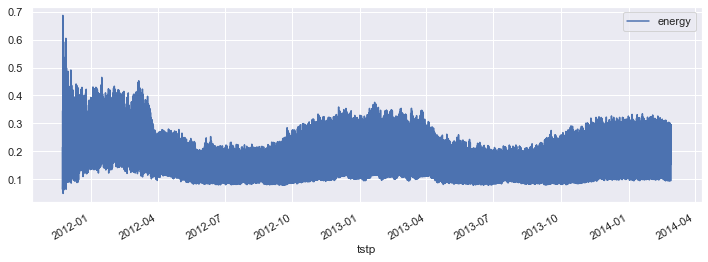

In [396]:
df_Adversity.plot(y="energy", figsize=(12, 4))

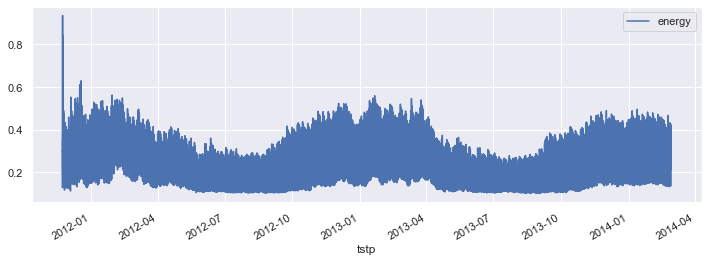

In [397]:
df_Affluent.plot(y="energy", figsize=(12, 4))

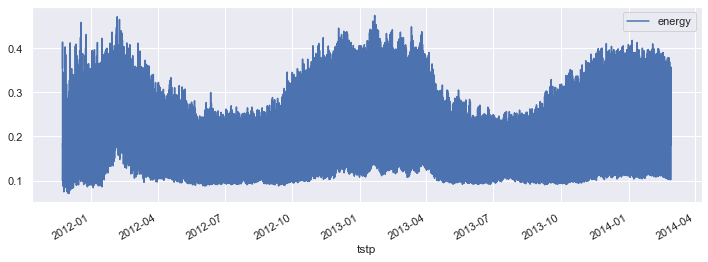

In [398]:
df_Comfortable.plot(y="energy", figsize=(12, 4))

In [399]:
print(df_Adversity)

                                            tstp   energy  temperature
tstp                                                                  
2011-11-23 09:30:00  2011-11-23 09:30:00.0000000  0.14700         3.42
2011-11-23 10:30:00  2011-11-23 10:30:00.0000000  0.06300         4.24
2011-11-23 11:30:00  2011-11-23 11:30:00.0000000  0.12000         5.94
2011-11-23 12:30:00  2011-11-23 12:30:00.0000000  0.08950         7.25
2011-11-23 13:30:00  2011-11-23 13:30:00.0000000  0.34500         8.29
...                                          ...      ...          ...
2014-02-27 19:30:00  2014-02-27 19:30:00.0000000  0.28950         3.99
2014-02-27 20:30:00  2014-02-27 20:30:00.0000000  0.28014         3.47
2014-02-27 21:30:00  2014-02-27 21:30:00.0000000  0.25358         2.50
2014-02-27 22:30:00  2014-02-27 22:30:00.0000000  0.22791         1.41
2014-02-27 23:30:00  2014-02-27 23:30:00.0000000  0.17387         1.42

[39723 rows x 3 columns]


In [400]:

df_Affluent =  makeFeatures(df_Affluent)
df_Comfortable =  makeFeatures(df_Comfortable)
df_Adversity =  makeFeatures(df_Adversity)
df_All =  makeFeatures(df_All)



In [401]:
df_Affluent

,energy,temperature,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
tstp,,,,,,,,,,
2011-11-23 10:30:00,0.12700,4.24,10,2,4,11,2011,327,23,47
2011-11-23 11:30:00,0.56400,5.94,11,2,4,11,2011,327,23,47
2011-11-23 12:30:00,0.77033,7.25,12,2,4,11,2011,327,23,47
2011-11-23 13:30:00,0.29450,8.29,13,2,4,11,2011,327,23,47
2011-11-23 14:30:00,0.35425,10.36,14,2,4,11,2011,327,23,47
...,...,...,...,...,...,...,...,...,...,...
2014-02-27 20:00:00,0.40977,3.47,20,3,1,2,2014,58,27,9
2014-02-27 21:00:00,0.39611,2.50,21,3,1,2,2014,58,27,9
2014-02-27 22:00:00,0.36022,1.41,22,3,1,2,2014,58,27,9


In [441]:
def makePairPlot(df,title,fileName=''):
    pp = sns.pairplot(df.dropna(),
                 hue='hour',
                 x_vars=['hour','dayofweek',
                         'weekofyear'],
                 y_vars='energy',
                 height=5,
                 plot_kws={'alpha':0.15, 'linewidth':0}
                )
    
    
    # 1st plot
    pp.axes[0,0].set_xlabel('Hour of day')
    pp.axes[0,0].set_ylabel('energy kWh (per half hour)')
    pp.axes[0,0].set_ylim([0, 0.8])  

    # 2nd plot
    pp.axes[0,1].set_xlabel('Day of week')
    pp.axes[0,1].set_ylim([0, 0.8])  

    # 3rd plot
    pp.axes[0,2].set_xlabel('Week of year')
    pp.axes[0,2].set_ylim([0, 0.8])
    plt.suptitle(title)
    if fileName:
        plt.savefig(fileName, dpi=160)
    
    plt.show()

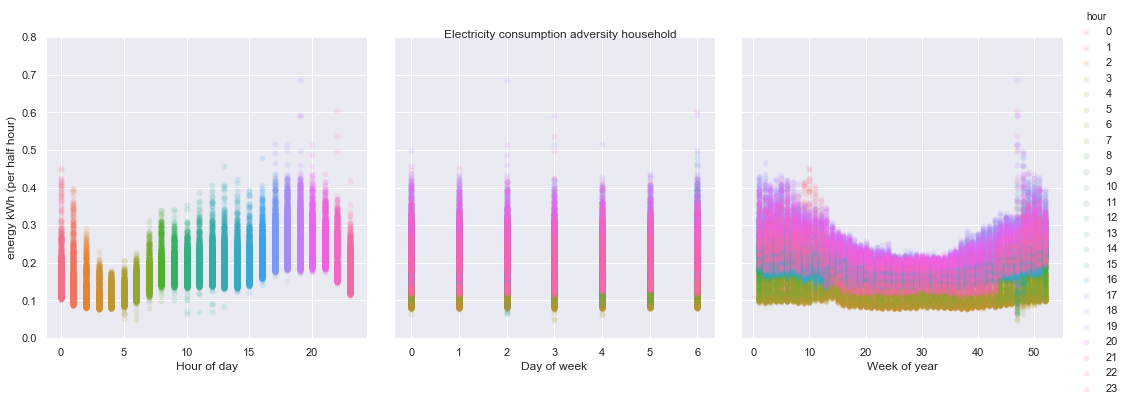

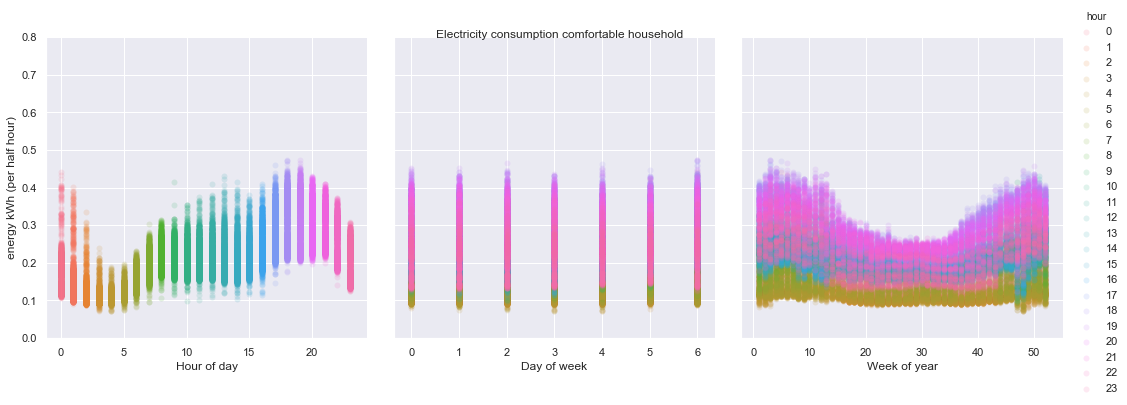

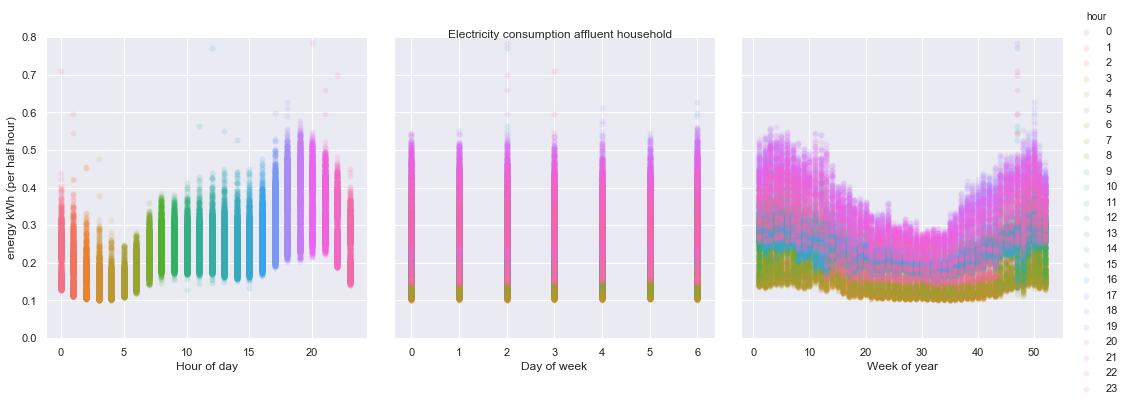

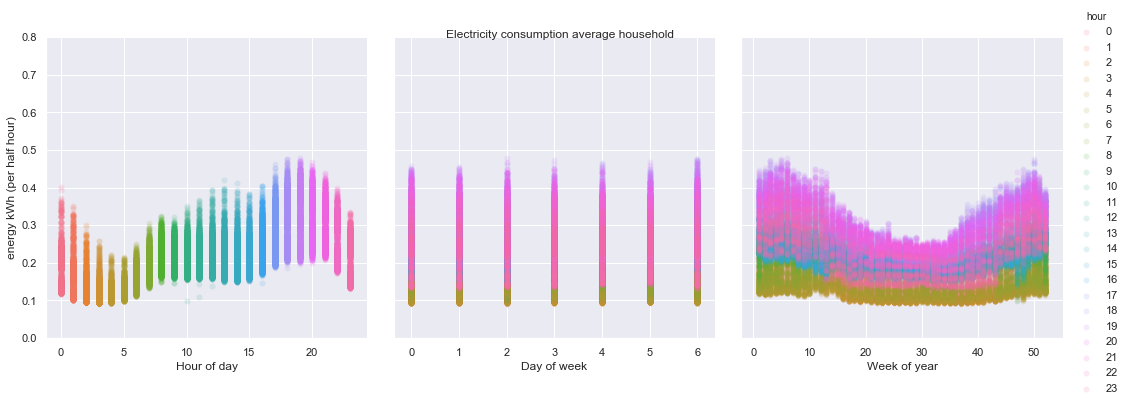

In [442]:
makePairPlot(df_Adversity, 'Electricity consumption adversity household','consump_Adversity.png')
makePairPlot(df_Comfortable, 'Electricity consumption comfortable household','consump_Comfortable.png')
makePairPlot(df_Affluent, 'Electricity consumption affluent household','consump_Affluent.png')
makePairPlot(df_All, 'Electricity consumption average household','consump_All.png')

In [404]:
df_All = df_All.sort_values(by=['tstp'])
df_Adversity = df_Adversity.sort_values(by=['tstp'])
df_Comfortable = df_Comfortable.sort_values(by=['tstp'])
df_Affluent = df_Affluent.sort_values(by=['tstp'])

In [405]:
print(df_All.head(5))
print(df_All.tail(5))

                      energy  temperature  hour  dayofweek  quarter  month  \
tstp                                                                         
2011-11-23 09:00:00  0.28450         3.42     9          2        4     11   
2011-11-23 09:30:00  0.28050         3.42     9          2        4     11   
2011-11-23 10:00:00  0.15333         4.24    10          2        4     11   
2011-11-23 10:30:00  0.09800         4.24    10          2        4     11   
2011-11-23 11:00:00  0.11029         5.94    11          2        4     11   

                     year  dayofyear  dayofmonth  weekofyear  
tstp                                                          
2011-11-23 09:00:00  2011        327          23          47  
2011-11-23 09:30:00  2011        327          23          47  
2011-11-23 10:00:00  2011        327          23          47  
2011-11-23 10:30:00  2011        327          23          47  
2011-11-23 11:00:00  2011        327          23          47  
            

In [406]:
dfAllFilt = df_All.loc['2014-01-01':'2014-02-01']

In [407]:
dfAllFilt

,energy,temperature,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
tstp,,,,,,,,,,
2014-01-01 00:00:00,0.25901,4.43,0,2,1,1,2014,1,1,1
2014-01-01 00:30:00,0.24506,4.43,0,2,1,1,2014,1,1,1
2014-01-01 01:00:00,0.22785,3.55,1,2,1,1,2014,1,1,1
2014-01-01 01:30:00,0.21053,3.55,1,2,1,1,2014,1,1,1
2014-01-01 02:00:00,0.19084,3.18,2,2,1,1,2014,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2014-02-01 21:30:00,0.31918,3.34,21,5,1,2,2014,32,1,5
2014-02-01 22:00:00,0.30430,3.27,22,5,1,2,2014,32,1,5
2014-02-01 22:30:00,0.28628,3.27,22,5,1,2,2014,32,1,5


In [446]:
def MakeProphetModel(df):
    # Make training size from 
    def weather_temp(ds):
        date = (pd.to_datetime(ds)).date()

        if d_df[date:].empty:
            return future_temp_df[date:]['future_temp'].values[0]
        else:
            return (d_df[date:]['temp']).values[0]
    
        return 0
    
    
    df = df[['energy','temperature']] 
    df['ds']=df.index
    X_train = df.loc['2012-01-01':'2013-12-31'].copy()
    X_test = df.loc['2014-01-01':'2014-12-31'].copy()
    y_train = X_train['energy']
    y_test = X_test['energy']
    
    X_train.columns = ['y','temperature','ds']
    X_test.columns = ['y','temperature','ds']
    
    model = Prophet(yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)
    model.add_seasonality(name="monthly", period=30.5, fourier_order=5)
    model.add_regressor('temperature')
    model.fit(X_train)
    
    
    return model,X_train, X_test

In [421]:
'''
def MakeProphetModelBack(df):
    train_size = int(0.8 * len(df))
    dfy = df['energy']
    dfX = df.drop('energy',1)
    #X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.8)
    X_train, X_test = df[:train_size].drop('energy',1), df[train_size:].drop('energy',1)
    
    y_train, y_test = df[:train_size]["energy"].values, df[train_size:]["energy"].values
    #train_df = pd.concat([pd.Series(X_train), pd.Series(y_train)], axis=1, keys=["ds", "y","temperature"])
    #test_df = pd.concat([pd.Series(X_test), pd.Series([0]*len(y_test))], axis=1, keys=["ds", "y","temperature"])
    train_df = pd.concat([pd.Series(X_train), pd.Series(y_train)], axis=1)
    test_df = pd.concat([pd.Series(X_test), pd.Series([0]*len(y_test))], axis=1)
    answer_df = pd.concat([pd.Series(X_test), pd.Series(y_test)], axis=1, keys=["ds", "y"])
    model = Prophet(yearly_seasonality=True)
    print(X_train)
    print(train_df)
    model.add_seasonality(name="monthly", period=30.5, fourier_order=5)
    model.add_regressor('temperature')
    model.fit(train_df)
    
    return model,train_df,test_df,answer_df
'''

'\ndef MakeProphetModelBack(df):\n    train_size = int(0.8 * len(df))\n    dfy = df[\'energy\']\n    dfX = df.drop(\'energy\',1)\n    #X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.8)\n    X_train, X_test = df[:train_size].drop(\'energy\',1), df[train_size:].drop(\'energy\',1)\n    \n    y_train, y_test = df[:train_size]["energy"].values, df[train_size:]["energy"].values\n    #train_df = pd.concat([pd.Series(X_train), pd.Series(y_train)], axis=1, keys=["ds", "y","temperature"])\n    #test_df = pd.concat([pd.Series(X_test), pd.Series([0]*len(y_test))], axis=1, keys=["ds", "y","temperature"])\n    train_df = pd.concat([pd.Series(X_train), pd.Series(y_train)], axis=1)\n    test_df = pd.concat([pd.Series(X_test), pd.Series([0]*len(y_test))], axis=1)\n    answer_df = pd.concat([pd.Series(X_test), pd.Series(y_test)], axis=1, keys=["ds", "y"])\n    model = Prophet(yearly_seasonality=True)\n    print(X_train)\n    print(train_df)\n    model.add_seasonality(name="mon

In [447]:
modelAdv, train_dfAdv,test_dfAdv = MakeProphetModel(df_Adversity)
modelComf, train_dfComf,test_dfComf = MakeProphetModel(df_Comfortable)
modelAffl, train_dfAffl,test_dfAffl= MakeProphetModel(df_Affluent)

/Users/hansremy/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [448]:
modelAll, train_dfAll,test_dfAll= MakeProphetModel(df_All)

/Users/hansremy/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#modelAdv, train_dfAdv,test_dfAdv = MakeProphetModel(df_Adversity)
#modelComf, train_dfComf,test_dfComf = MakeProphetModel(df_Comfortable)
#modelAffl, train_dfAffl,test_dfAffl= MakeProphetModel(df_Affluent)

In [449]:
import pickle
pickle.dump(modelAdv, open('modelAdv.pckl', 'wb'))
pickle.dump(modelComf, open('modelComf.pckl', 'wb'))
pickle.dump(modelAffl, open('modelAffl.pckl', 'wb'))
pickle.dump(modelAll, open('modelAll.pckl', 'wb'))

In [471]:
modelAdv = pd.read_pickle(('modelAdv.pckl') )
modelComf = pd.read_pickle(('modelComf.pckl') )
modelAffl = pd.read_pickle(('modelAffl.pckl') )
modelAll = pd.read_pickle(('modelAll.pckl') )

In [472]:
print(test_dfAdv[:480])

                           y  temperature                  ds
tstp                                                         
2014-01-01 00:00:00  0.22234         4.43 2014-01-01 00:00:00
2014-01-01 00:30:00  0.21104         4.43 2014-01-01 00:30:00
2014-01-01 01:00:00  0.20274         3.55 2014-01-01 01:00:00
2014-01-01 01:30:00  0.18399         3.55 2014-01-01 01:30:00
2014-01-01 02:00:00  0.16540         3.18 2014-01-01 02:00:00
...                      ...          ...                 ...
2014-01-10 21:30:00  0.25696         6.03 2014-01-10 21:30:00
2014-01-10 22:00:00  0.23824         5.91 2014-01-10 22:00:00
2014-01-10 22:30:00  0.23087         5.91 2014-01-10 22:30:00
2014-01-10 23:00:00  0.21192         5.66 2014-01-10 23:00:00
2014-01-10 23:30:00  0.19031         5.66 2014-01-10 23:30:00

[480 rows x 3 columns]


In [473]:

forecastAdv = modelAdv.predict(test_dfAdv[:480])
forecastComf = modelComf.predict(test_dfComf[:480])
forecastAffl = modelAffl.predict(test_dfAffl[:480])
forecastAll = modelAll.predict(test_dfAll[:480])

In [477]:
def mean_abs_perc_error(valTrue,valPred):
    valTrue, valPred = np.array(valTrue), np.array(valPred)
    return np.mean(np.abs((valTrue-valPred)/ valPred))

In [478]:
forecastAll.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01 00:00:00,0.197789,0.175442,0.239391,0.197789,0.197789,0.011102,0.011102,0.011102,-0.031746,...,-0.001475,-0.001475,-0.001475,0.031541,0.031541,0.031541,0.0,0.0,0.0,0.208891
1,2014-01-01 00:30:00,0.197786,0.162159,0.228050,0.197786,0.197786,-0.002750,-0.002750,-0.002750,-0.045597,...,-0.001459,-0.001459,-0.001459,0.031537,0.031537,0.031537,0.0,0.0,0.0,0.195037
2,2014-01-01 01:00:00,0.197784,0.149386,0.217802,0.197784,0.197784,-0.012957,-0.012957,-0.012957,-0.058226,...,-0.001447,-0.001447,-0.001447,0.031533,0.031533,0.031533,0.0,0.0,0.0,0.184827
3,2014-01-01 01:30:00,0.197781,0.136512,0.206033,0.197781,0.197781,-0.024792,-0.024792,-0.024792,-0.070051,...,-0.001439,-0.001439,-0.001439,0.031529,0.031529,0.031529,0.0,0.0,0.0,0.172990
4,2014-01-01 02:00:00,0.197779,0.130678,0.194533,0.197779,0.197779,-0.034857,-0.034857,-0.034857,-0.081123,...,-0.001435,-0.001435,-0.001435,0.031525,0.031525,0.031525,0.0,0.0,0.0,0.162922


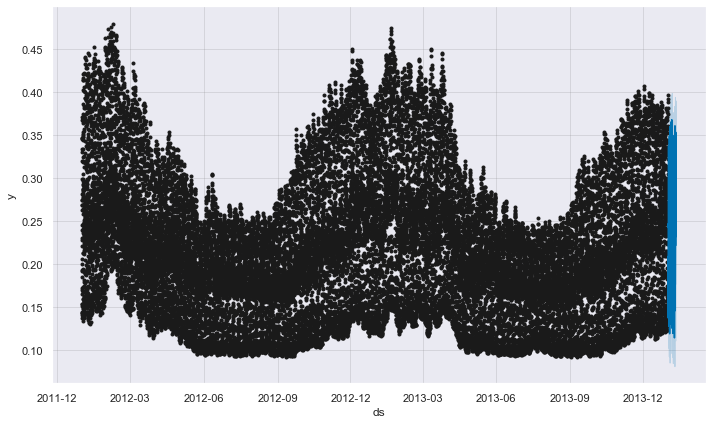

In [479]:


modelAll.plot(forecastAll).savefig('./Graphs/mvpforcastMain.png');

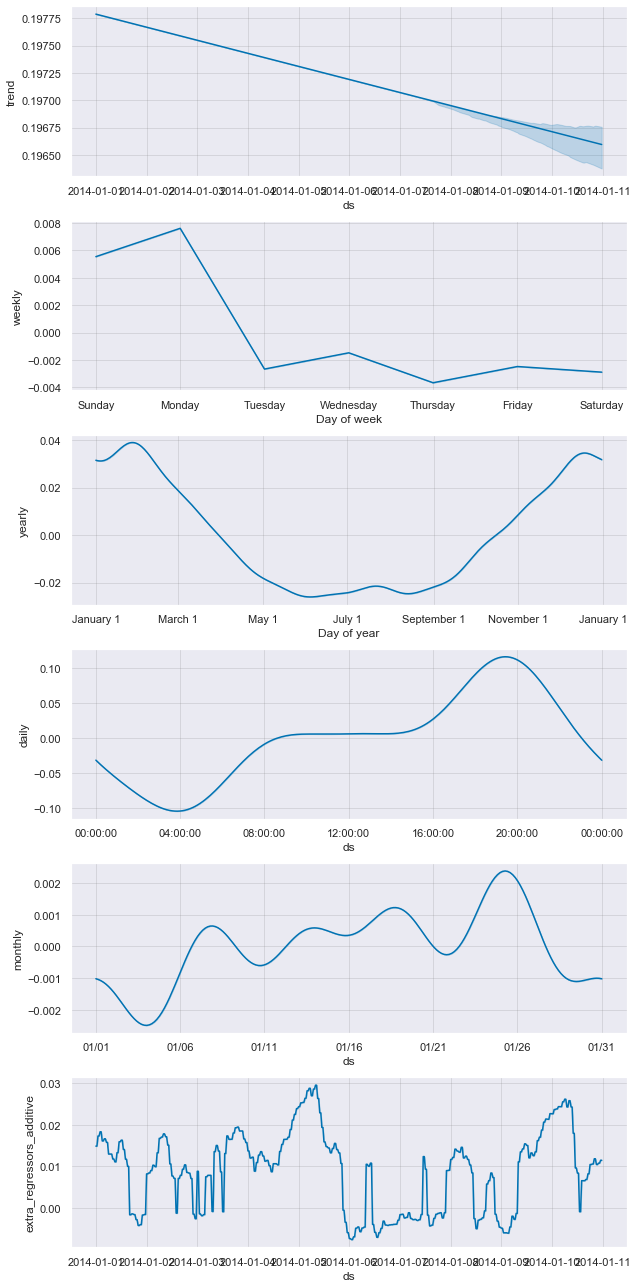

In [480]:
#modelAll.plot_components(forecastAll)
modelAll.plot_components(forecastAll).savefig('./Graphs/mvpcompforcastMain.png');

In [481]:
df_cv = cross_validation(modelAll, horizon="31 days")
df_cv.head()

INFO:fbprophet:Making 22 forecasts with cutoffs between 2013-01-09 11:30:00 and 2013-11-30 23:30:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-01-09 12:00:00,0.242886,0.207649,0.277446,0.21748,2013-01-09 11:30:00
1,2013-01-09 12:30:00,0.243522,0.209065,0.275934,0.21642,2013-01-09 11:30:00
2,2013-01-09 13:00:00,0.243166,0.207632,0.280661,0.21962,2013-01-09 11:30:00
3,2013-01-09 13:30:00,0.242926,0.209876,0.278797,0.21546,2013-01-09 11:30:00
4,2013-01-09 14:00:00,0.242899,0.207182,0.277177,0.21115,2013-01-09 11:30:00


In [484]:
mae = mean_abs_perc_error(df_cv.y,df_cv.yhat)
print(mae)

0.126080100501847


In [483]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days 02:30:00,0.000582,0.024121,0.018886,0.097784,0.076508,0.843993
1,3 days 03:00:00,0.000583,0.024147,0.018900,0.098040,0.076804,0.843604
2,3 days 03:30:00,0.000584,0.024175,0.018921,0.098336,0.076804,0.842993
3,3 days 04:00:00,0.000586,0.024197,0.018943,0.098655,0.076924,0.842382
4,3 days 04:30:00,0.000586,0.024218,0.018959,0.098935,0.077228,0.842076
...,...,...,...,...,...,...,...
1335,30 days 22:00:00,0.001166,0.034148,0.027098,0.140895,0.114138,0.704601
1336,30 days 22:30:00,0.001164,0.034123,0.027075,0.140835,0.114042,0.705740
1337,30 days 23:00:00,0.001166,0.034141,0.027089,0.140994,0.114576,0.706324
1338,30 days 23:30:00,0.001168,0.034174,0.027121,0.141301,0.114834,0.706546


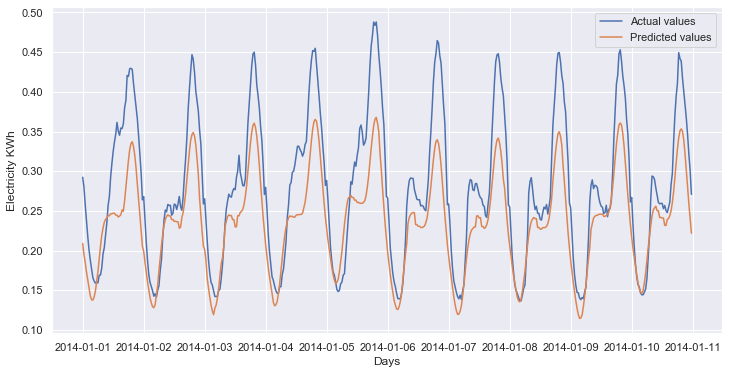

In [468]:
plt.figure(figsize= (12,6))
plt.plot(test_dfAffl["ds"][:480], test_dfAffl["y"][:480],label='Actual values')
plt.plot(forecastAll["ds"], forecastAll["yhat"],label='Predicted values')
plt.xlabel('Days')
plt.ylabel('Electricity KWh')
plt.legend()
plt.savefig('graphs/PredAll10Days.png',transparant = True,dpi = 100);

In [ ]:
# We have to add week and month seasonality
model = Prophet(weekly_seasonality=True)
model.add_seasonality(name="monthly", period=30.5, fourier_order=5)
model.fit(train_df)

In [ ]:
forecast = model.predict(test_df)
forecast.head()

In [ ]:
model.plot(forecast)

In [ ]:
model.plot_components(forecast)
